In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

resnet = models.resnet18(pretrained=True)
# Удаление последнего полносвязного слоя
resnet = nn.Sequential(*list(resnet.children())[:-1])

resnet.eval()

preprocess = transforms.Compose([
   # transforms.Resize((224, 224)),
    transforms.ToTensor(),
   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 106MB/s]


In [ ]:

image_with_objects = Image.open("abc.png").convert('RGB')  # Изображение с большим количеством объектов
image_with_single_object = Image.open("diplodoce.png").convert('RGB')  # Изображение с одним объектом

# порежем изображение с динозаврами на много частей
our_squarez = []
for i in range(10,1090,90):
  row = []
  for j in range(10,730,120):
    box = (j, i, j+120, i+90)
    square = image_with_objects.crop(box)
    row.append(square)
  our_squarez.append(row)
# Преобразование изображений в тензоры PyTorch
for i in range(len(our_squarez)):
  for j in range(len(our_squarez[i])):
    our_squarez[i][j] = preprocess(our_squarez[i][j]).unsqueeze(0)
image_with_single_object_tensor = preprocess(image_with_single_object).unsqueeze(0)

# Получение векторов активаций для изображений
with torch.no_grad():
    for i in range(len(our_squarez)):
      for j in range(len(our_squarez[i])):
        our_squarez[i][j] = resnet(our_squarez[i][j])
    activations_single_object = resnet(image_with_single_object_tensor)

In [ ]:
activations_single_object.shape

torch.Size([1, 512, 1, 1])

In [ ]:
for i in range(len(our_squarez)):
      for j in range(len(our_squarez[i])):
        our_squarez[i][j] = torch.norm(our_squarez[i][j] - activations_single_object )

In [ ]:
our_squarez[2][1]

tensor(35.5077)

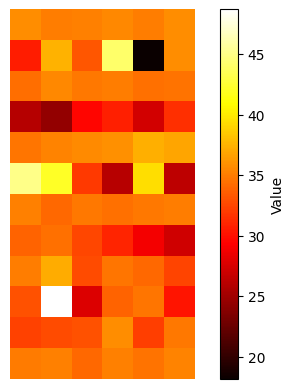

In [ ]:
# Визуализация тепловой карты
plt.imshow(our_squarez, cmap='hot', interpolation='nearest')
plt.colorbar(label='Value')
plt.axis('off')
plt.show()



In [ ]:
snd_dino = Image.open("2nd_dino.jpg")

In [ ]:
our_squarez2 = []
for i in range(10,600,40):
  row = []
  for j in range(10,459,60):
    box = (j, i, j+60, i+40)
    square = snd_dino.crop(box)
    row.append(square)
  our_squarez2.append(row)
# Преобразование изображений в тензоры PyTorch
for i in range(len(our_squarez2)):
  for j in range(len(our_squarez2[i])):
    our_squarez2[i][j] = preprocess(our_squarez2[i][j]).unsqueeze(0)

# Получение векторов активаций для изображений
with torch.no_grad():
    for i in range(len(our_squarez2)):
      for j in range(len(our_squarez2[i])):
        our_squarez2[i][j] = resnet(our_squarez2[i][j])
snd_dino = preprocess(snd_dino)

In [ ]:
snd_dino.shape

torch.Size([3, 602, 459])

In [ ]:
for i in range(len(our_squarez2)):
      for j in range(len(our_squarez2[i])):
        our_squarez2[i][j] = torch.norm(our_squarez2[i][j] - activations_single_object )

In [ ]:
our_squarez2

[]

`

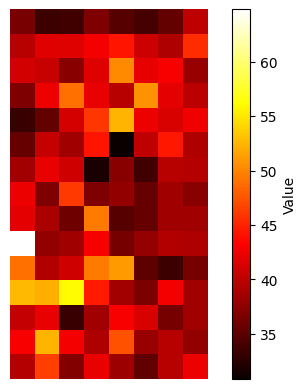

In [ ]:
# Визуализация тепловой карты
plt.imshow(our_squarez2, cmap='hot', interpolation='nearest')
plt.colorbar(label='Value')
plt.axis('off')
plt.show()
